Full Name: Nguyễn Trọng Nhân

Student ID: 22521005

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

Normal Equation R2 score:  0.9014805010668647
Gradient Descend R2 score:  0.6269163479449615


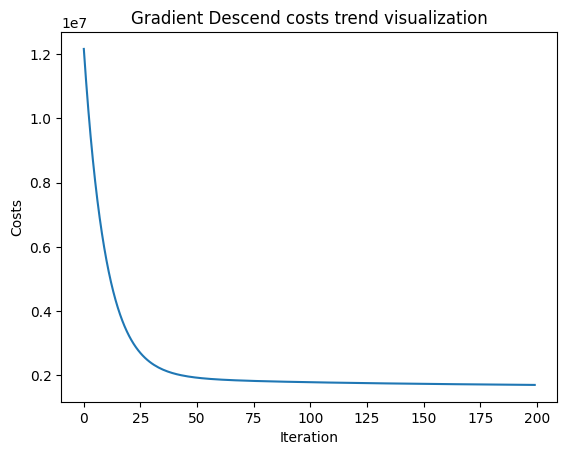

In [160]:
import numpy as np
from numpy import mean, std, percentile
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sbn
from sklearn.linear_model import SGDRegressor

def testPreprocessing(data):
    for col in data.columns: 
        # calculate summary statistics
        data_mean, data_std = mean(data[col]), std(data[col])
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        # identify outliers
        outliers = [x for x in data[col] if x < lower or x > upper]
        # remove outliers
        data = data[~((data[col] < lower)|(data[col] > upper))]
    return data

def dataPreprocessing(data):
    for col in data.columns: 
        # calculate interquartile range
        q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in data[col] if x < lower or x > upper]
        # remove outliers
        data = data[~((data[col] < lower)|(data[col] > upper))]
    return data

class LinearRegression_GD:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []
        for n_iters in range (self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)
            cost = np.sum(diff ** 2)/2
            self.costs.append(cost)

fish_data = pd.read_csv("fish.csv")
fish_data = dataPreprocessing(fish_data)
#sbn.boxplot(fish_data)
X = fish_data.drop(columns = ['Weight'])
X = X.values
y = fish_data['Weight']
# summarize the shape of the training dataset
#print(X.shape, y.shape)
# identify outliers in the training dataset
#lof = LocalOutlierFactor()
#yhat = lof.fit_predict(X)
# select all rows that are not outliers
#mask = yhat != -1
#X, y = X[mask, :], y[mask]
# summarize the shape of the updated training dataset
#print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521005)


reg_GD = LinearRegression_GD(eta = 0.0000069, max_iter = 200, random_state = 22521005)
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print("Normal Equation R2 score: ", R2(y_test, reg_NE.predict(X_test)))
print("Gradient Descend R2 score: ", R2(y_test, reg_GD.predict(X_test)))

"""
reg_SGD = SGDRegressor(eta0 = 0.00001, max_iter=200, learning_rate='constant')
reg_SGD.fit(X_train, y_train)
print("SGD R2 score: ", R2(y_test, reg_SGD.predict(X_test)))
"""

costs = reg_GD.costs
plt.plot(range(0, 200), costs)
plt.title("Gradient Descend costs trend visualization")
plt.xlabel("Iteration")
plt.ylabel("Costs")
plt.show()

# tesla Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health tesla

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

Normal Equation R2 score:  0.7342134142209361
Gradient Descend R2 score:  0.7027990055584592


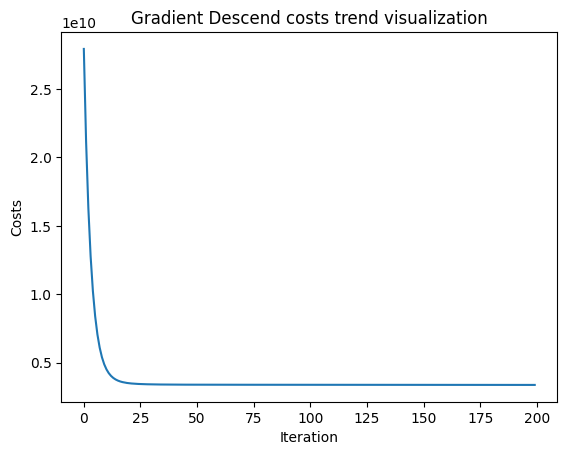

In [172]:
# Code here
import numpy as np
from numpy import mean, std, percentile
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import seaborn as sbn


def dataTranform(data):
    data['sex'] = data['sex'].replace(['female', 'male'], [0, 1])
    data['smoker'] = data['smoker'].replace(['yes', 'no'], [1, 0])
    data['region'] = data['region'].replace(['southeast', 'southwest', 'northeast', 'northwest'], [0, 1, 2, 3])
    data.charges = pd.to_numeric(data.charges)
    data.columns.values
    return data
    

def dataPreprocessing(data):
    for col in data.columns: 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        low_fence = Q1-(1.5*IQR)
        up_fence = Q3+(1.5*IQR)
        #print(data[((data[col] < low_fence)|(data[col] > up_fence))])
        data = data[~((data[col] < low_fence)|(data[col] > up_fence))]
    return data

class LinearRegression_GD:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []
        for n_iters in range (self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)
            cost = np.sum(diff ** 2)/2
            self.costs.append(cost)

tesla_data = pd.read_csv("tesla.csv")
insurance_data = dataTranform(insurance_data)
insurance_data = dataPreprocessing(insurance_data)

X = insurance_data.drop(columns = ['charges'])
X = X.values
y = insurance_data['charges']
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521005)
# summarize the shape of the training dataset
#print(X.shape, y.shape)
# identify outliers in the training dataset
#lof = LocalOutlierFactor()
#yhat = lof.fit_predict(X)
# select all rows that are not outliers
#mask = yhat != -1
#X, y = X[mask, :], y[mask]
# summarize the shape of the updated training datasetprint(X.shape, y.shape)
#print(X.shape, y.shape)

reg_GD = LinearRegression_GD(eta = 0.000001, max_iter = 200, random_state = 22521005)
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print("Normal Equation R2 score: ", R2(y_test, reg_NE.predict(X_test)))
print("Gradient Descend R2 score: ", R2(y_test, reg_GD.predict(X_test)))

"""
reg_SGD = SGDRegressor(eta0 = 0.00001, max_iter=200, learning_rate='constant')
reg_SGD.fit(X_train, y_train)
print("SGD R2 score: ", R2(y_test, reg_SGD.predict(X_test)))
"""

costs = reg_GD.costs
plt.plot(range(0, 200), costs)
plt.title("Gradient Descend costs trend visualization")
plt.xlabel("Iteration")
plt.ylabel("Costs")
plt.show() 



# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

Normal Equation R2 score:  0.9997390265125917
Gradient Descend R2 score:  0.2585317862797146
SGD R2 score:  0.2524226956706884


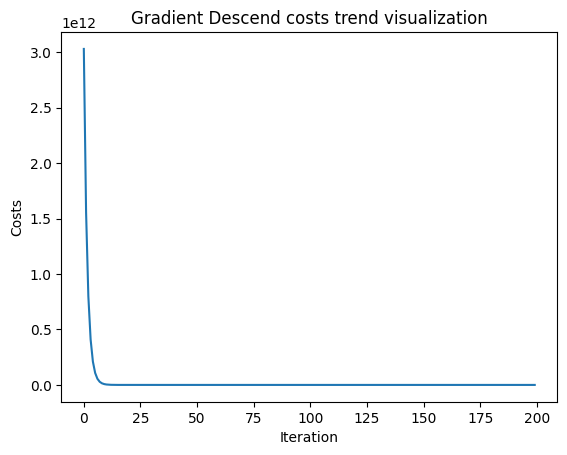

In [190]:
# Code here
import numpy as np
from numpy import mean, std, percentile
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import seaborn as sbn
    

def dataPreprocessing(data):
    for col in data.columns: 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        low_fence = Q1-(1.5*IQR)
        up_fence = Q3+(1.5*IQR)
        #print(data[((data[col] < low_fence)|(data[col] > up_fence))])
        data = data[~((data[col] < low_fence)|(data[col] > up_fence))]
    return data

class LinearRegression_GD:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []
        for n_iters in range (self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)
            cost = np.sum(diff ** 2)/2
            self.costs.append(cost)

tesla_data = pd.read_csv("tesla_stock.csv")
tesla_data = dataPreprocessing(tesla_data)

X = tesla_data.drop(columns = ['Close'])
X = X.values
y = tesla_data['Close']
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521005)
# summarize the shape of the training dataset
#print(X.shape, y.shape)
# identify outliers in the training dataset
#lof = LocalOutlierFactor()
#yhat = lof.fit_predict(X)
# select all rows that are not outliers
#mask = yhat != -1
#X, y = X[mask, :], y[mask]
# summarize the shape of the updated training datasetprint(X.shape, y.shape)
#print(X.shape, y.shape)

reg_GD = LinearRegression_GD(eta = 0.00000000000000003, max_iter = 200, random_state = 22521005)
reg_GD.fit(X_train, y_train)
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print("Normal Equation R2 score: ", R2(y_test, reg_NE.predict(X_test)))
print("Gradient Descend R2 score: ", R2(y_test, reg_GD.predict(X_test)))


reg_SGD = SGDRegressor(eta0 = 0.000000000000000001, max_iter=200, learning_rate='constant')
reg_SGD.fit(X_train, y_train)
print("SGD R2 score: ", R2(y_test, reg_SGD.predict(X_test)))


costs = reg_GD.costs
plt.plot(range(0, 200), costs)
plt.title("Gradient Descend costs trend visualization")
plt.xlabel("Iteration")
plt.ylabel("Costs")
plt.show() 
